## Our Objective :
Your mission is to design and implement an Information Retrieval (IR) system capable of efficiently
retrieving relevant documents from a given dataset. Below are the key steps and details for this project

## Importing Python Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Collection & Preparation 

In [2]:
Df = pd.read_csv('article.csv')
df = Df[['Category','Article text']]
df

,Category,Article text
0,news,"(CNN)Right now, there's a shortage of truck d..."
1,news,(CNN)Working in a factory or warehouse can me...
2,news,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,business,The pandemic thrust the working world into a n...
4,business,New York (CNN Business)March Madness isn't jus...
...,...,...
37944,sport,(CNN)Russian President Vladimir Putin has bee...
37945,news,"Lviv, Ukraine (CNN)A long line of men snakes o..."
37946,sport,(CNN)Major League Baseball (MLB) is postponin...
37947,news,Here's a look at the life of Mikhail Gorbachev...


## 2. Data Preprocessing
- Tokenization.
 - Lowercasing.
 - Removing punctuation.
 - Handling missing values, if any.
 - You should also create an inverted index, a data structure that maps terms (words) to their
corresponding documents.

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Handling Missing Values If Any

In [5]:
df.isnull().sum()       # There is no Missing value or NaNs in our data

Category        0
Article text    9
dtype: int64

In [6]:
# Lowercase the text in the Text column
df['Article text'] = df['Article text'].str.lower()

C:\Users\bb\AppData\Local\Temp\ipykernel_13512\773913245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].str.lower()


# Creating a preprocessing function for Applying all preprocessing steps

## Applying the Preprocessing function

In [7]:
 stops_word = set(stopwords.words("english"))

def preprocess(text):
    if isinstance(text, float):
        text = str(text)  # Convert float to string
    text = re.sub(r'[^\w\s]', " ", text)
    lem = WordNetLemmatizer()
    words = word_tokenize(text)
    text1 = [lem.lemmatize(word) for word in words]
    Array = [stop_word for stop_word in text1 if stop_word not in stops_word]
    return " ".join(Array)

In [8]:
## Apply preprocessing
df["Article text"] = df["Article text"].apply(preprocess)

C:\Users\bb\AppData\Local\Temp\ipykernel_13512\1977350170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Article text"] = df["Article text"].apply(preprocess)


## Data View After Data Cleaning and Preprocessing

In [9]:
df

,Category,Article text
0,news,cnn right shortage truck driver u worldwide ex...
1,news,cnn working factory warehouse mean task repeti...
2,news,cnn hong kong warehouse swarm autonomous robot...
3,business,pandemic thrust working world new reality marc...
4,business,new york cnn business march madness college ba...
...,...,...
37944,sport,cnn russian president vladimir putin ha stripp...
37945,news,lviv ukraine cnn long line men snake unassumin...
37946,sport,cnn major league baseball mlb postponing march...
37947,news,look life mikhail gorbachev former president u...


## Exploratory Data Analysis of Article's  Text Data

In [10]:
from wordcloud import WordCloud
from collections import Counter

## Analysis of Categories of Text Data

[Text(0.5, 1.0, 'Categories of Articles In Text Sentiment DataSet')]

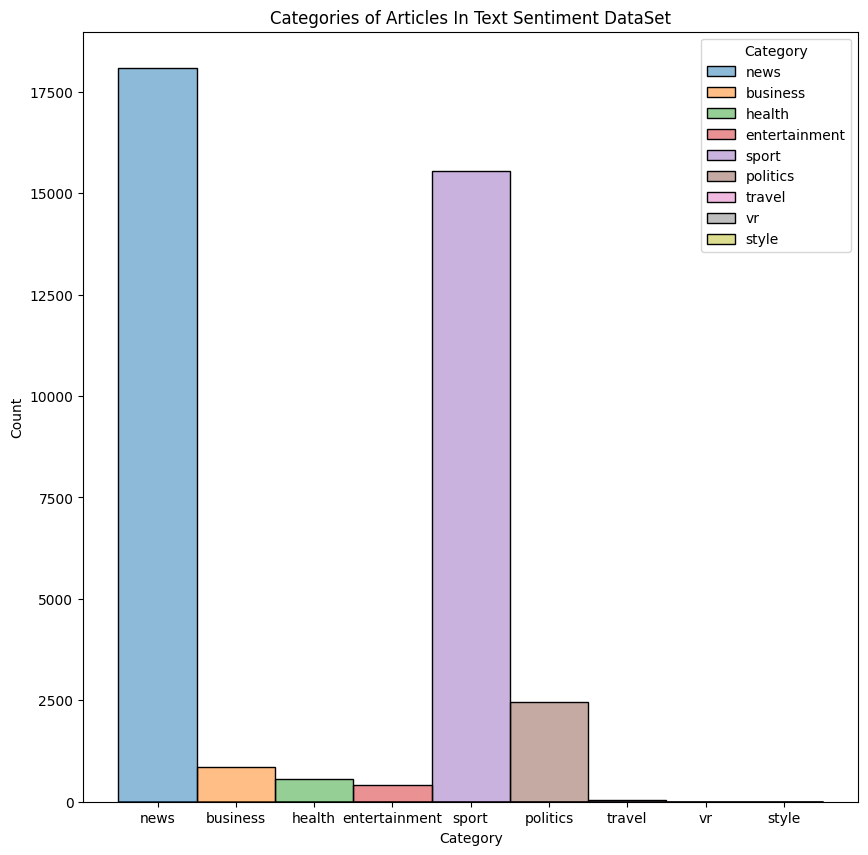

In [11]:
# Visualising the Sentiment Data
plt.figure(figsize=(10, 10))
sns.histplot(data = df, x = df['Category'], hue = 'Category').set(title=f'Categories of Articles In Text Sentiment DataSet')

## The above Visualise Histogram helps us in knowing about meaningful insights regarding the Artical Text Data :

1. News is the most occured Artical Category in dataset.
2. The 2nd most used Artical Category is Sports.
3. Politics is the 3rd most lying Artical category.
4. Business, Health, Entertainment, Travel, Style and vr are other Article Categories Lying in Data

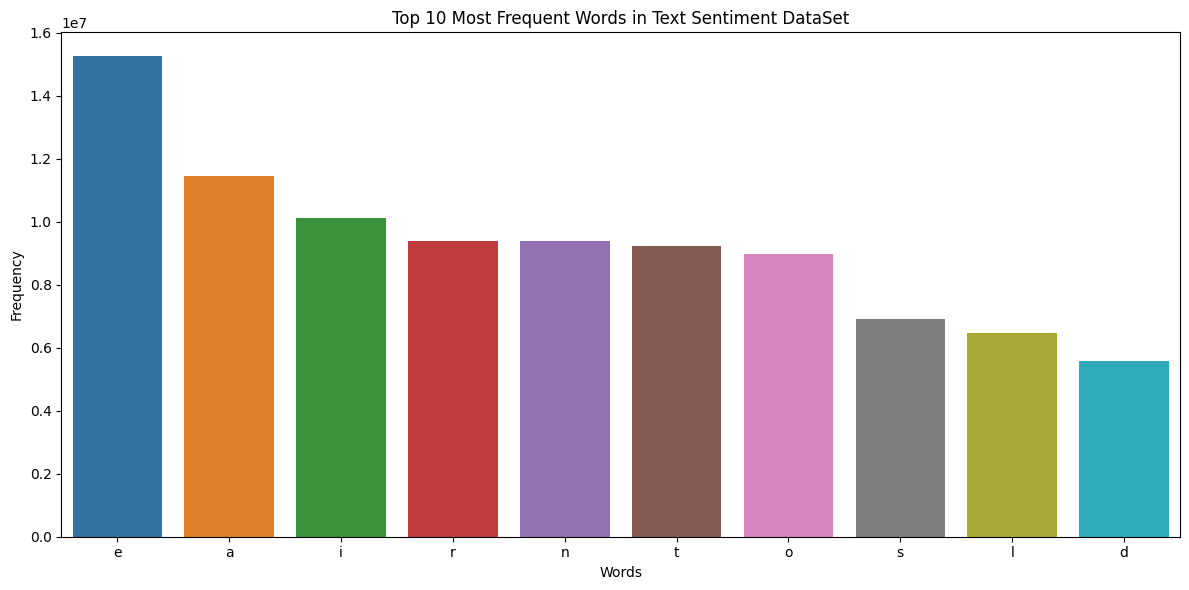

In [12]:
# Combining the Text data for analysis
combine_text =''.join([' '.join(text_list) for text_list in df['Article text']])

# Calculate word frequencies
words = combine_text.split()
word_freq = Counter(words)

# Coverting word frequecies into DataFrame for Visualizations 
word_freq = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
p = word_freq.sort_values(by='Frequency',ascending=False)
Word=p['Word']
frequency=p['Frequency']

# Create a bar plot of word frequencies
plt.figure(figsize=(12,6))
sns.barplot(x=(Word.head(10)), y=(frequency.head(10))).set(title=f'Top 10 Most Frequent Words in Text Sentiment DataSet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) of textual Articles  data by Visualization Through WordCloud

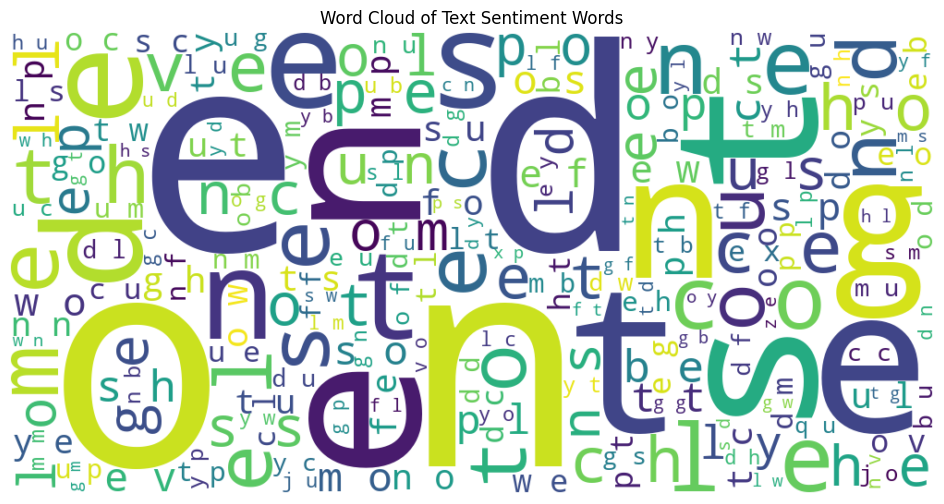

In [13]:
# Generating Word Cloud
wordcloud = WordCloud(width=1000, height=500,background_color='white').generate(' '.join(words))

# Visualization of Words using matplotlib in Word Cloud form
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Sentiment Words")
plt.show()

## 3. User Query Interface

In [48]:
## create a input query function

def query():
    query = input("Write the query(Text) :\n ")
    
    query1 = preprocess(query)
    
    print("\nThe query after preprocessing: \n" ,query1)
    
    return query1

In [49]:
query()

Write the query(Text) :
 j

The query after preprocessing: 
 j


'j'

## 4. Retrieval Algorithm: Implement the Term Frequency-Inverse Document Frequency (TF-IDF) as Feature Engineering of Artical Text Data

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
df['Article text']

0        cnn right shortage truck driver u worldwide ex...
1        cnn working factory warehouse mean task repeti...
2        cnn hong kong warehouse swarm autonomous robot...
3        pandemic thrust working world new reality marc...
4        new york cnn business march madness college ba...
                               ...                        
37944    cnn russian president vladimir putin ha stripp...
37945    lviv ukraine cnn long line men snake unassumin...
37946    cnn major league baseball mlb postponing march...
37947    look life mikhail gorbachev former president u...
37948    cnn look life royal highness duchess cornwall ...
Name: Article text, Length: 37949, dtype: object

In [50]:
def algorithm():
    tf = TfidfVectorizer() # Create a TF-IDF vectorizer
    
    tf_Article = tf.fit_transform(df['Article text']) # Fit the vectorizer on preprocessed documents
    
    query111 = query()
    
    tf_query = tf.transform([query111]) # Transform the preprocessed query using the TF-IDF vectorizer
    
    cosine_similarities = cosine_similarity(tf_query, tf_Article) # Calculate cosine similarities between query vector and document vectors
    
    return cosine_similarities, query11

## Query Processing

In [51]:
## Search the text for the most relevant match
cosine_similarities, query11 = algorithm()
max_text_index = cosine_similarities[0].argmax()


print(f"\nThe index is: {max_text_index}\n")
print(df["Article text"].iloc[max_text_index])
print()

Write the query(Text) :
 look like

The query after preprocessing: 
 look like

The index is: 7311

cnn since stepping back acting cameron diaz say le focused appearance care said recent conversation michelle visage rule breaker podcast literally last thing think daily basis like maybe day look like diaz turn 50 august said focus beauty entertainment industry felt toxic start pick apart said current attitude relaxed diaz joked barely wash face despite billion product home read twice month lucky like oh better put one time work right said place right like put energy worrying judging go back trap especially society like value think important diaz said look important fine diaz began career model starred multiple hit movie like something mary also successful author businesswoman said imagine returning acting



## First 3 Query Matches :

In [60]:
ranked_article = np.argsort(cosine_similarities[0])[::-1]
retrieved_docs = [df['Article text'][idx] for idx in ranked_article[:3]] 

In [61]:
for i ,news in enumerate(retrieved_docs):
    print(i)
    print(news)
    print(100*"-")
    print("\n")
    if i == 4:
        break

0
cnn since stepping back acting cameron diaz say le focused appearance care said recent conversation michelle visage rule breaker podcast literally last thing think daily basis like maybe day look like diaz turn 50 august said focus beauty entertainment industry felt toxic start pick apart said current attitude relaxed diaz joked barely wash face despite billion product home read twice month lucky like oh better put one time work right said place right like put energy worrying judging go back trap especially society like value think important diaz said look important fine diaz began career model starred multiple hit movie like something mary also successful author businesswoman said imagine returning acting
----------------------------------------------------------------------------------------------------


1
cnn never meet idol adage go fate brings together also place direct competition one world biggest sporting stage wa destiny tennis sensation cori coco gauff 2019 youngest ever q